## Exploratory Data Analysis (EDA) for the Cardio Heart Risk Detection


In [16]:
import kagglehub
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

# Download latest version

In [17]:
# Download latest version
path = kagglehub.dataset_download("redwankarimsony/heart-disease-data")

print("Path to dataset files:", path)

Path to dataset files: /Users/dvalia/.cache/kagglehub/datasets/redwankarimsony/heart-disease-data/versions/6


## Data loading and Overview

In [18]:
datafile = path + "/heart_disease_uci.csv"
data = pd.read_csv(datafile)

print(data.head())

# Check for missing values
print("checking for missing values")
print(data.isnull().sum())

# Check for duplicate rows
print("checking for duplicate rows")
print(data.duplicated().sum())

# Check for class imbalance
print("checking for class imbalance")
print(data['num'].value_counts())


   id  age     sex    dataset               cp  trestbps   chol    fbs  \
0   1   63    Male  Cleveland   typical angina     145.0  233.0   True   
1   2   67    Male  Cleveland     asymptomatic     160.0  286.0  False   
2   3   67    Male  Cleveland     asymptomatic     120.0  229.0  False   
3   4   37    Male  Cleveland      non-anginal     130.0  250.0  False   
4   5   41  Female  Cleveland  atypical angina     130.0  204.0  False   

          restecg  thalch  exang  oldpeak        slope   ca  \
0  lv hypertrophy   150.0  False      2.3  downsloping  0.0   
1  lv hypertrophy   108.0   True      1.5         flat  3.0   
2  lv hypertrophy   129.0   True      2.6         flat  2.0   
3          normal   187.0  False      3.5  downsloping  0.0   
4  lv hypertrophy   172.0  False      1.4    upsloping  0.0   

                thal  num  
0       fixed defect    0  
1             normal    2  
2  reversable defect    1  
3             normal    0  
4             normal    0  
checking

In [19]:
display(data.info())
display(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


None

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


## Target Variable Analysis

/var/folders/84/_3s4n8jj2sd32bzwhbbh9j6r0000gq/T/ipykernel_21334/1407441472.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=target_counts.index, y=target_counts.values, palette='viridis')


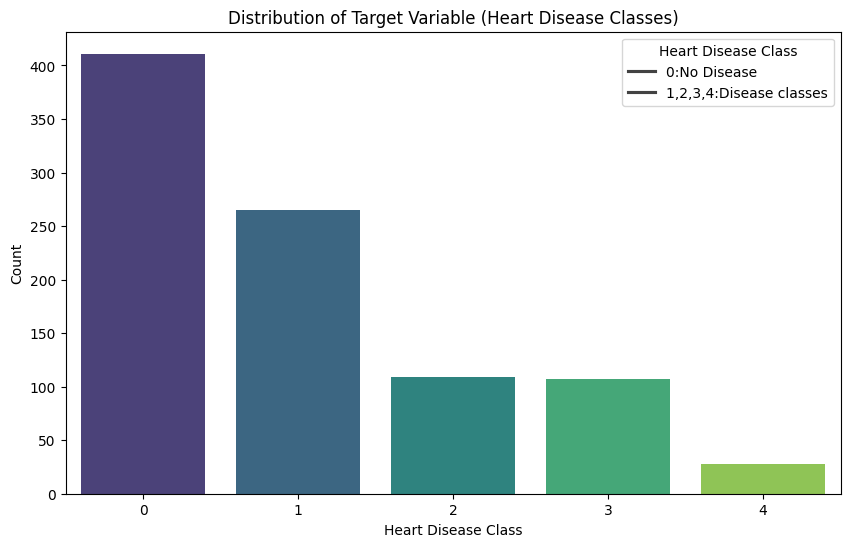

In [26]:
#target_counts = data['num'].value_counts(normalize=True)
target_counts = data['num'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=target_counts.index, y=target_counts.values, palette='viridis')
plt.title('Distribution of Target Variable (Heart Disease Classes)')
plt.xlabel('Heart Disease Class')
plt.ylabel('Count')
plt.legend(title='Heart Disease Class', labels=['0:No Disease', '1,2,3,4:Disease classes'])
plt.show()

## Numerical Feature Analysis
'id' is an incremental integer and 'num' is a target value; exclude both of them 

['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca']


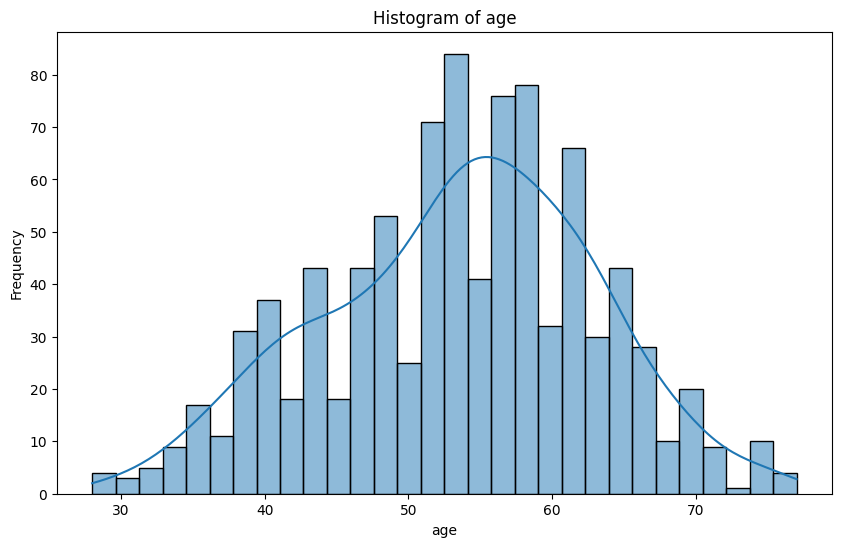

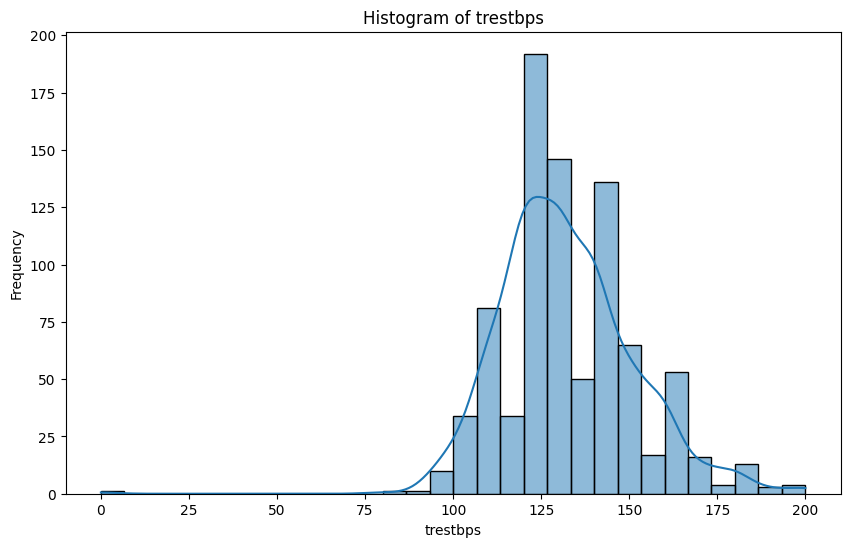

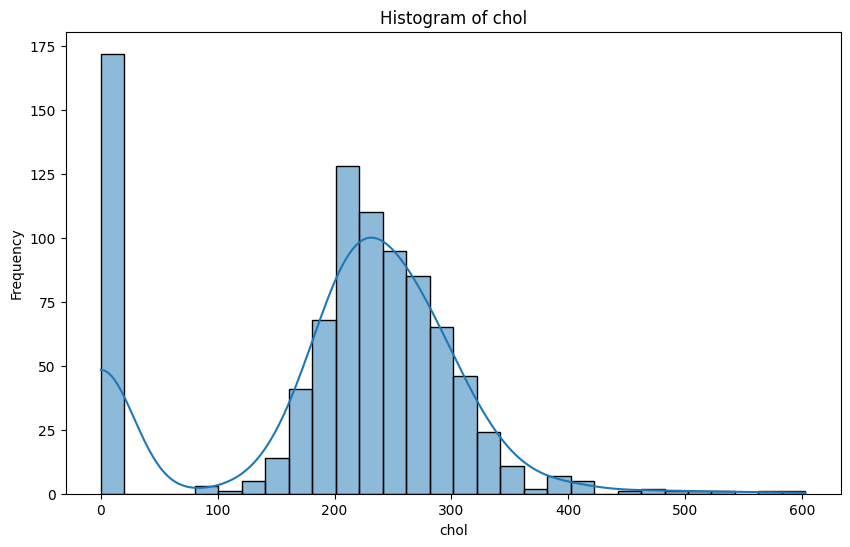

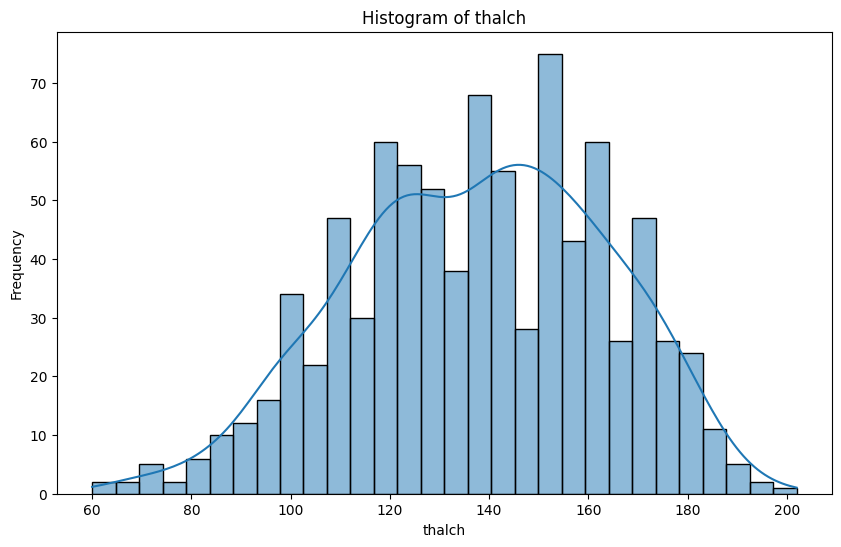

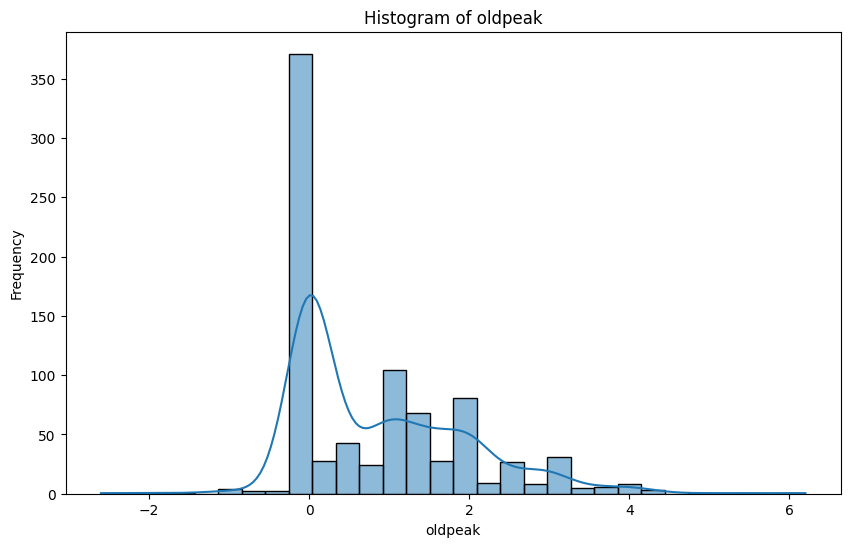

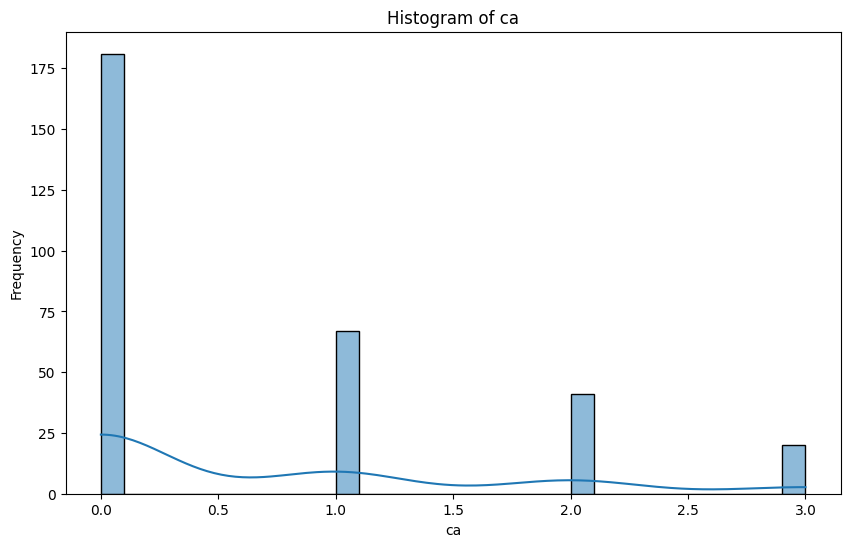

In [53]:
if 'id' in data.columns:
    data = data.drop(columns=['id']) # exclude 'id', not needed for analysis

numerical_features = data.select_dtypes(include=[np.number]).columns.tolist()
numerical_features.remove('num') # exclude target variable

print(numerical_features)

# Analyze numerical features
# plot histogram for each numerical feature
for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(data[feature], bins=30, kde=True)
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

    # save the figure
    # plt.savefig(f'{feature}_histogram.png')

## Categorical Feature Analysis

['sex', 'dataset', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']

sex value counts:
sex
Male      726
Female    194
Name: count, dtype: int64


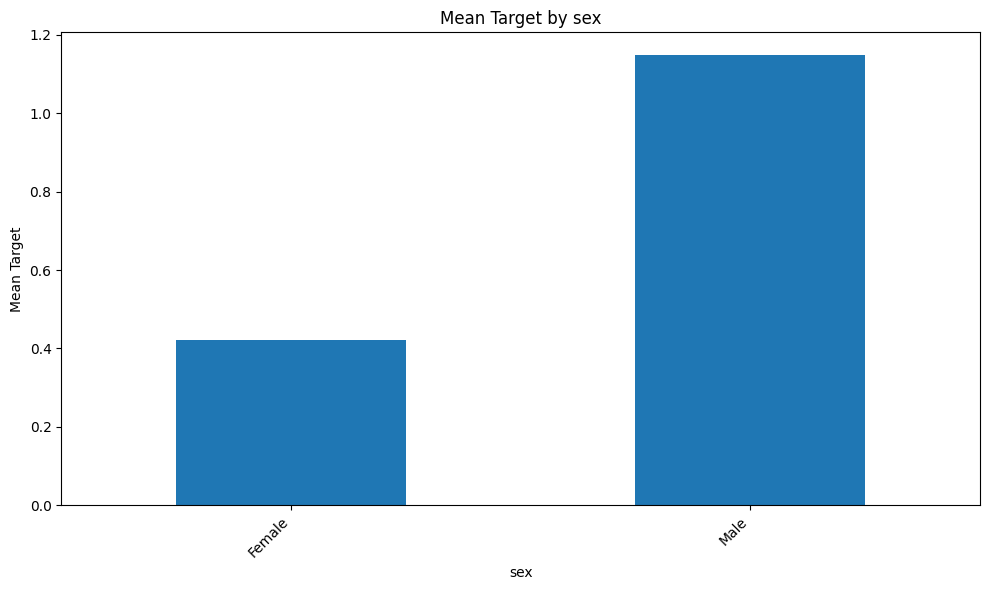


dataset value counts:
dataset
Cleveland        304
Hungary          293
VA Long Beach    200
Switzerland      123
Name: count, dtype: int64


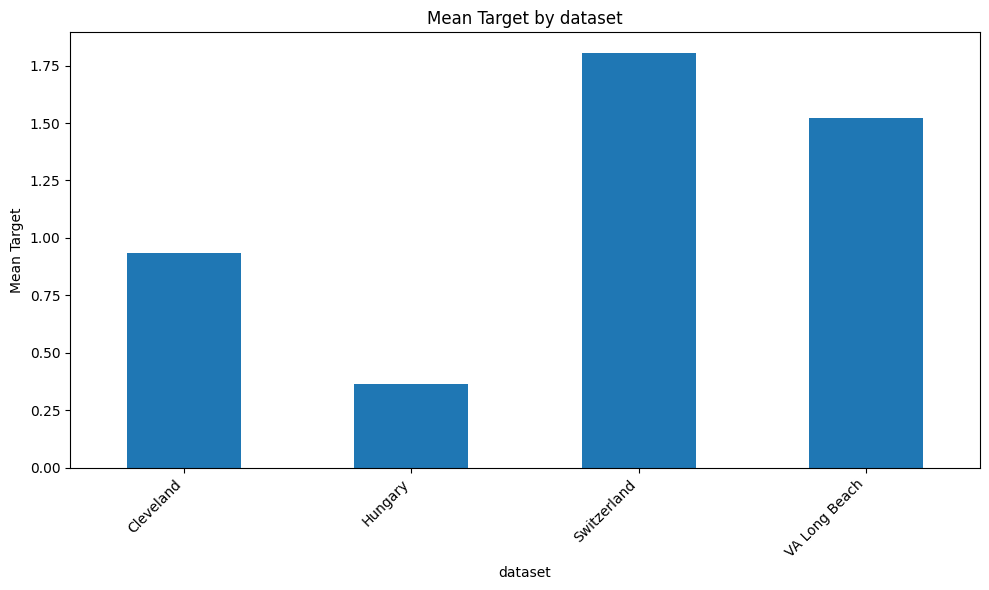


cp value counts:
cp
asymptomatic       496
non-anginal        204
atypical angina    174
typical angina      46
Name: count, dtype: int64


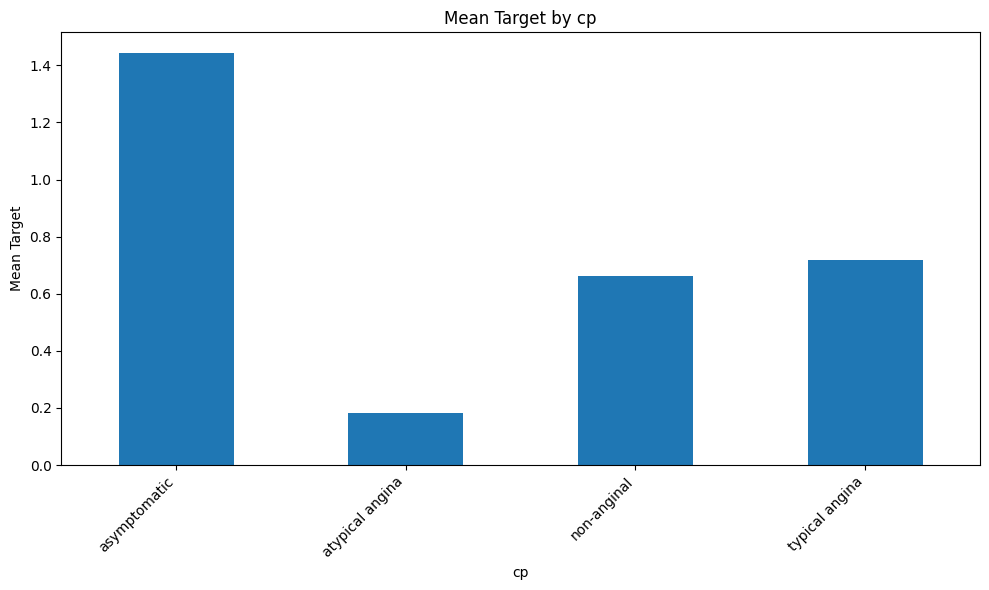


fbs value counts:
fbs
False    692
True     138
Name: count, dtype: int64


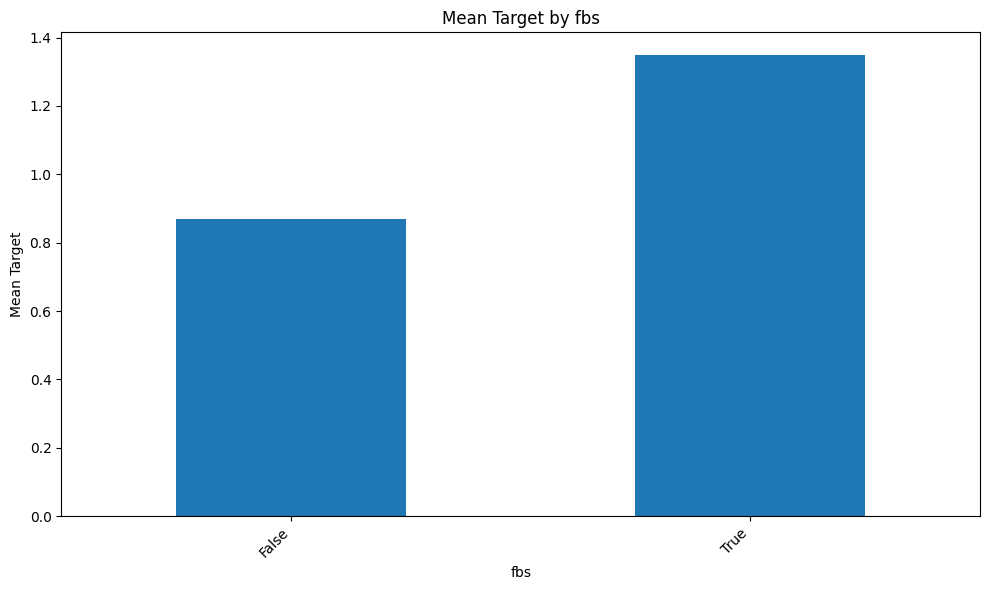


restecg value counts:
restecg
normal              551
lv hypertrophy      188
st-t abnormality    179
Name: count, dtype: int64


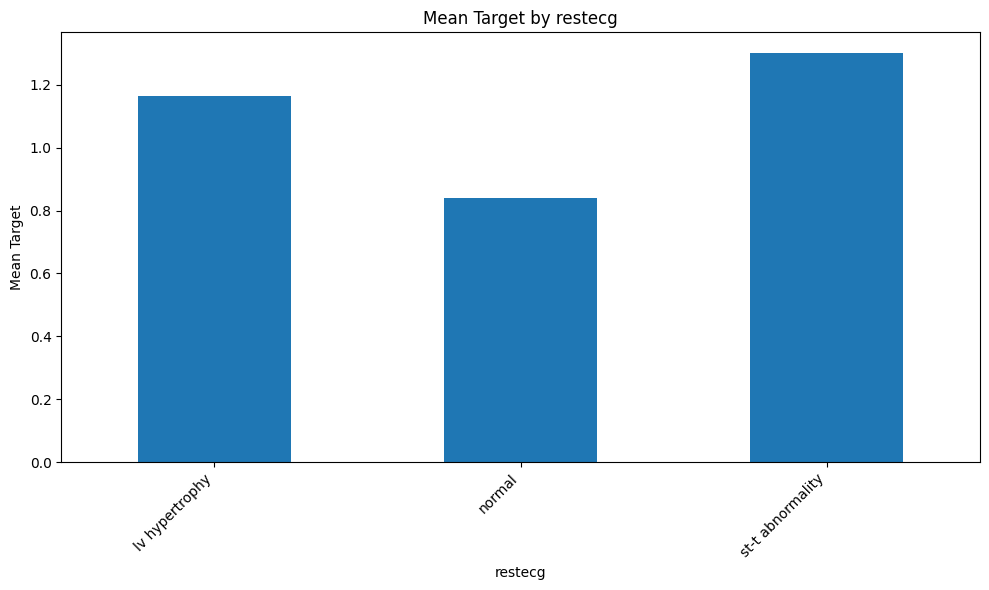


exang value counts:
exang
False    528
True     337
Name: count, dtype: int64


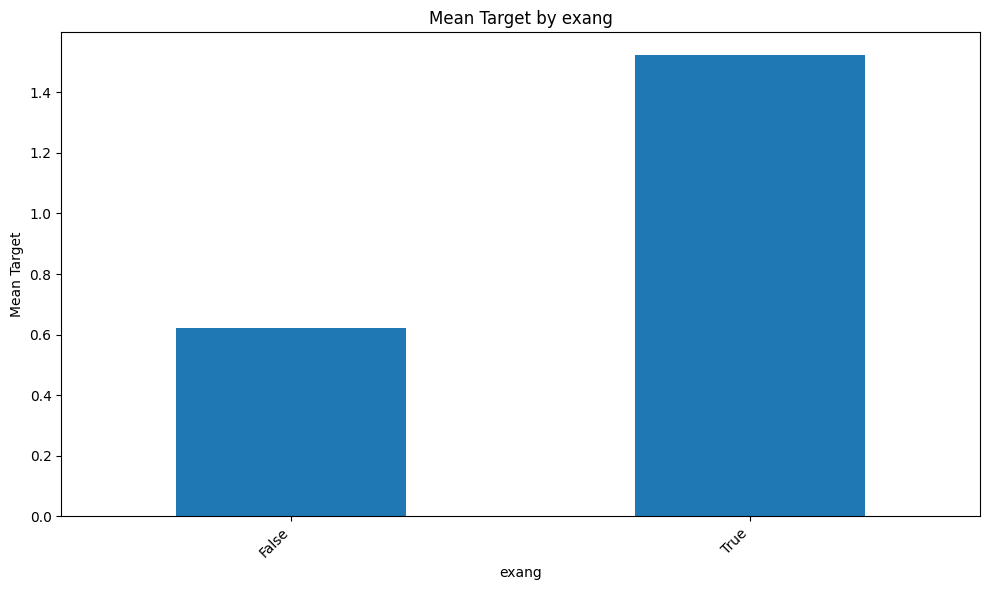


slope value counts:
slope
flat           345
upsloping      203
downsloping     63
Name: count, dtype: int64


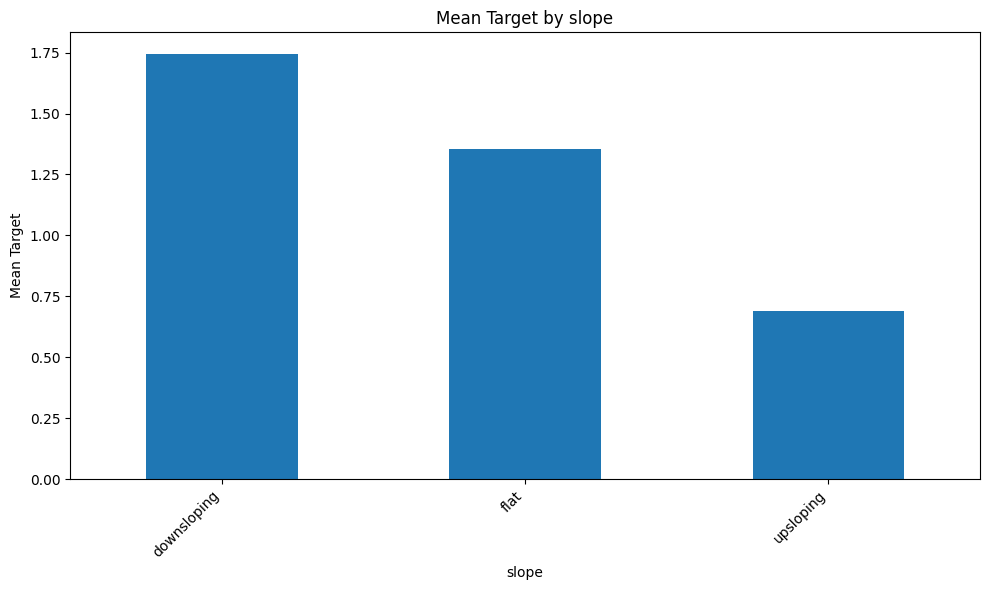


thal value counts:
thal
normal               196
reversable defect    192
fixed defect          46
Name: count, dtype: int64


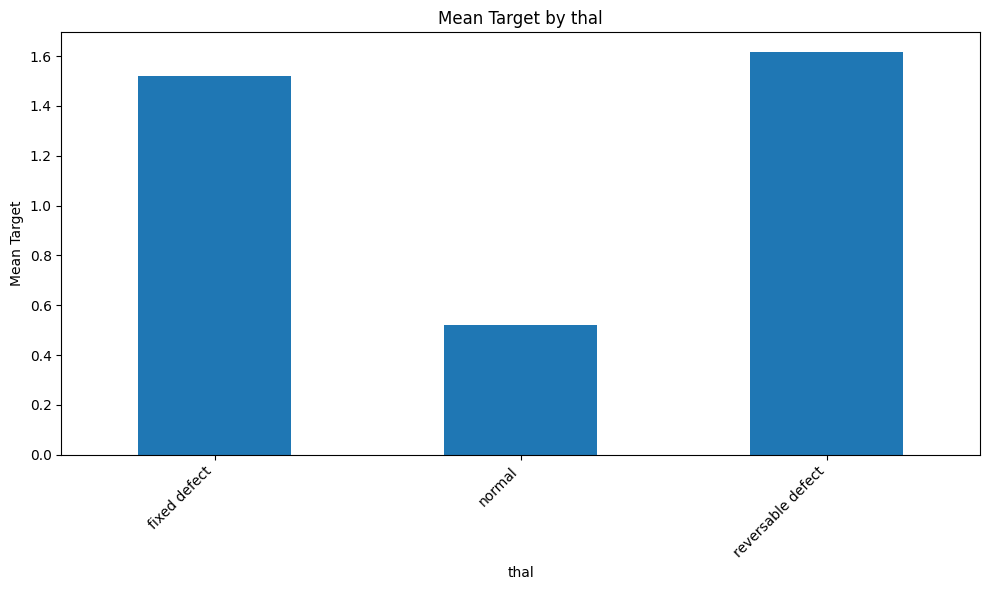

In [56]:
categorical_features = data.select_dtypes(include=['object']).columns.tolist()
print(categorical_features)

# plot bar plot for each categorical feature
for feature in categorical_features:
    print(f"\n{feature} value counts:")
    print(data[feature].value_counts())

    mean_target_by_category = data.groupby(feature)['num'].mean()

    plt.figure(figsize=(10, 6))
    # sns.countplot(data[feature], order=data[feature].value_counts().index)
    mean_target_by_category.plot(kind='bar')
    plt.title(f'Mean Target by {feature}')
    plt.xticks(rotation=45, ha='right')
    plt.xlabel(feature)
    plt.ylabel('Mean Target')
    plt.tight_layout()
    plt.show()

    # save the figure
    # plt.savefig(f'{feature}_countplot.png')

## Outlier Detection
Numerical features outliers visualized in boxplots

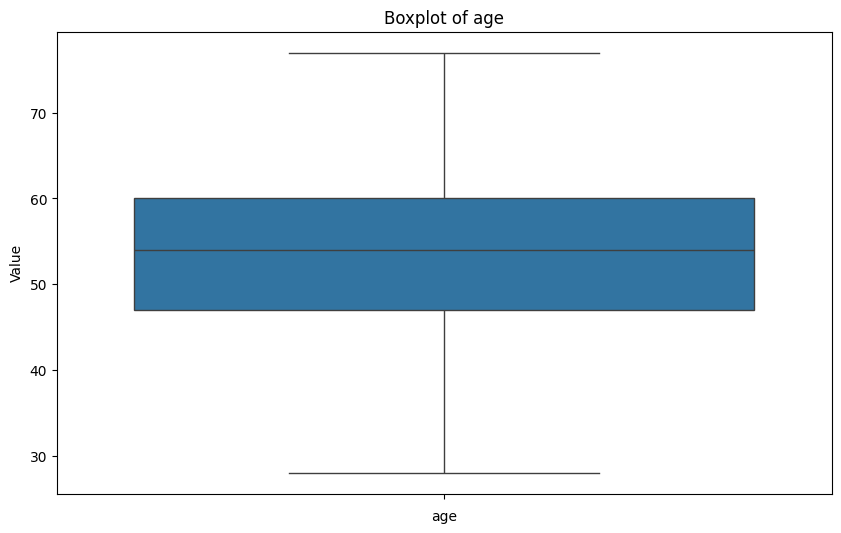

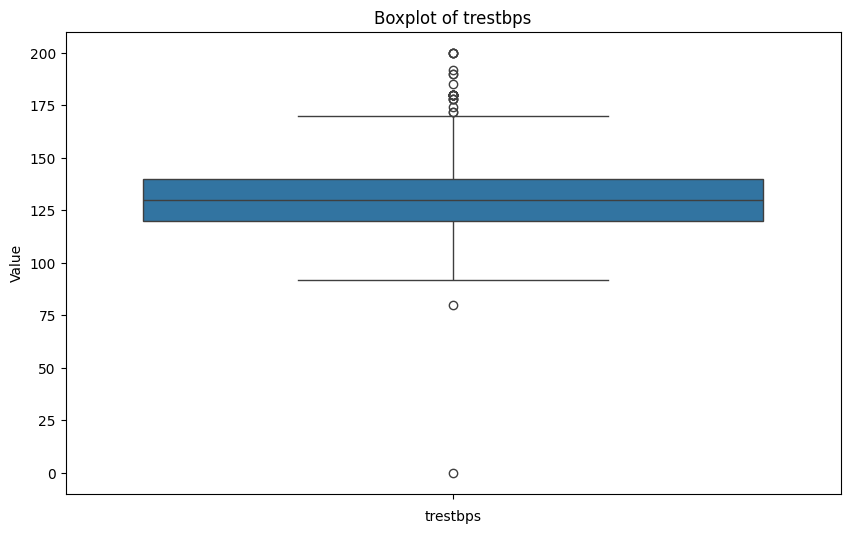

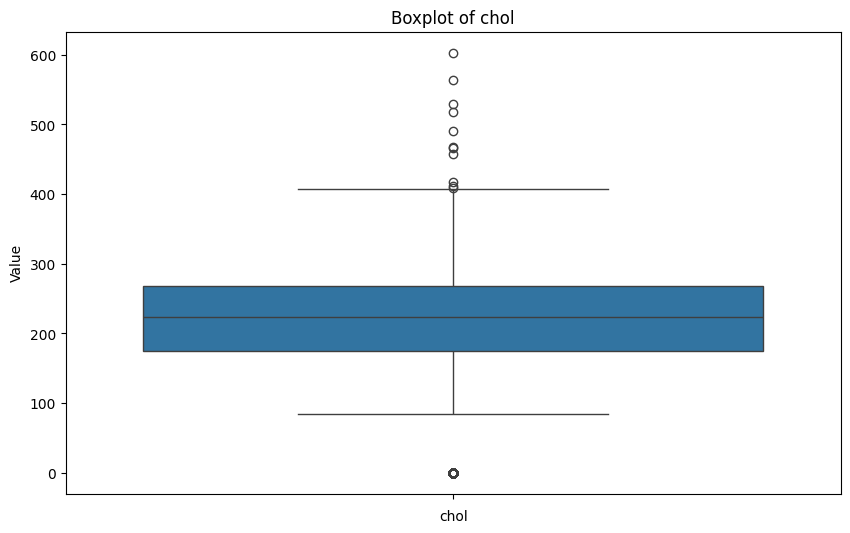

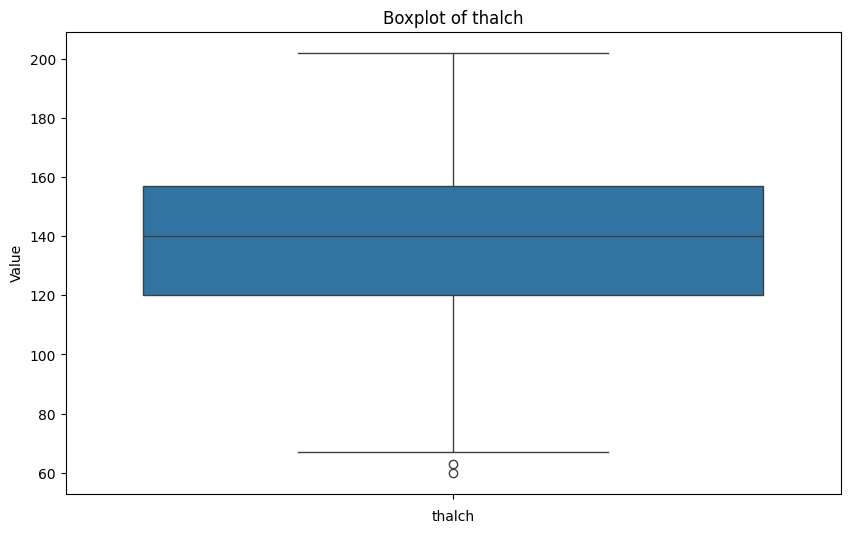

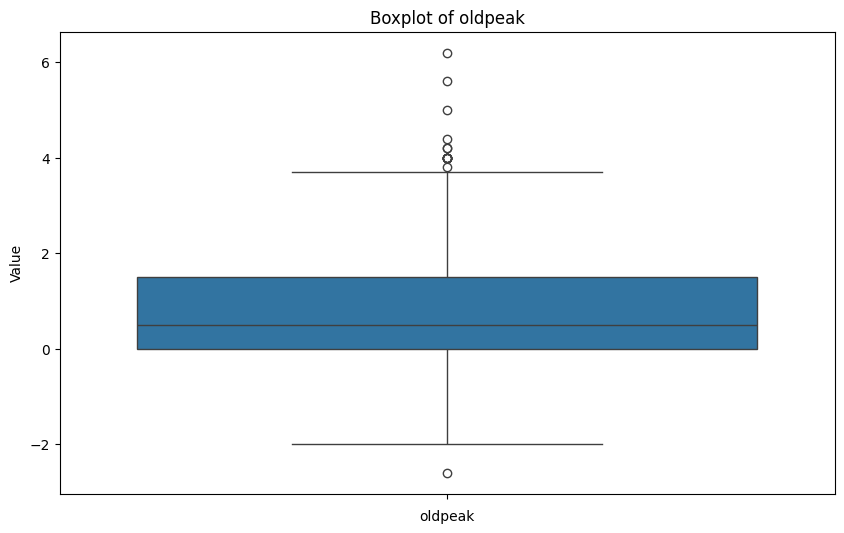

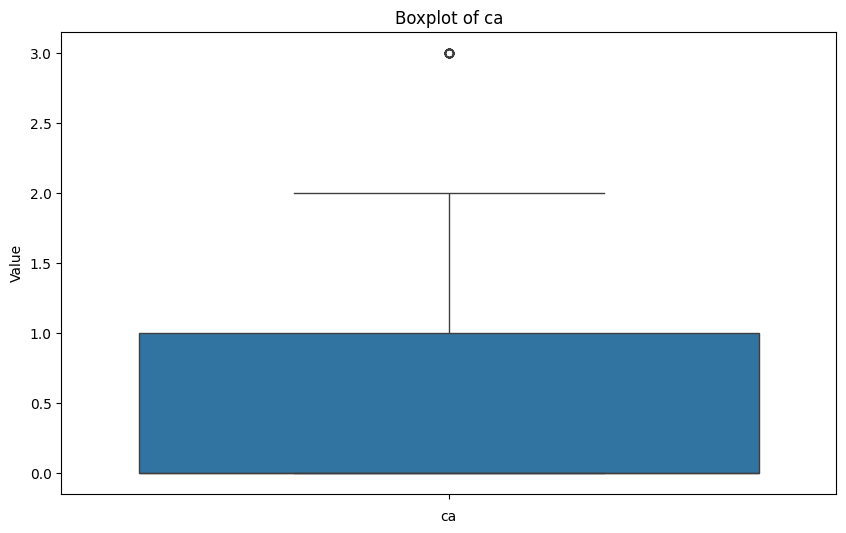

In [39]:
# plot boxplot for each numerical feature
for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data[feature])
    plt.title(f'Boxplot of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Value')
    plt.show()

    # save the figure

## Correlation Matrix

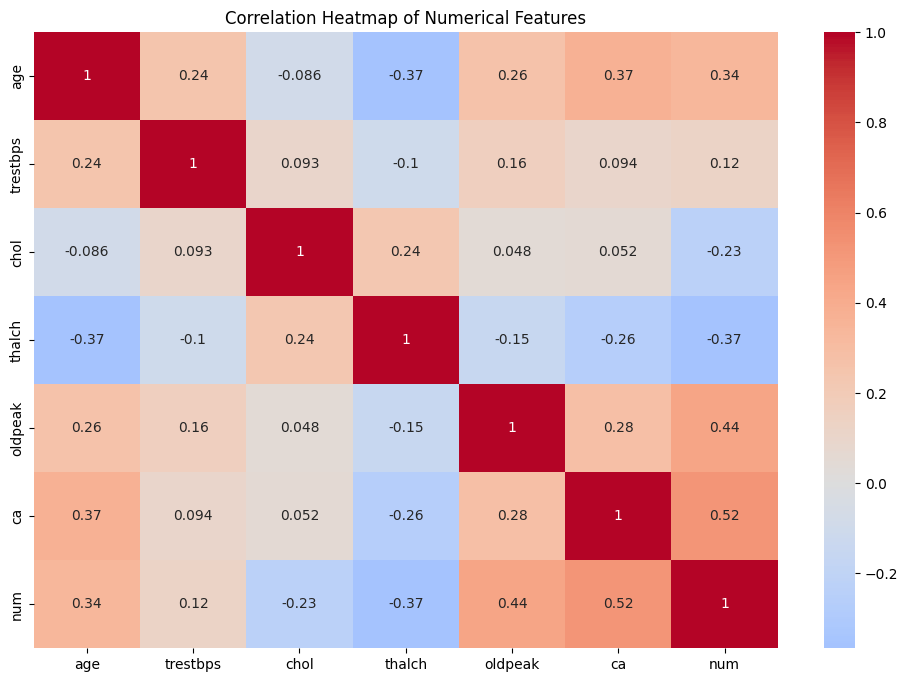

In [40]:
numerical_data = data.select_dtypes(include=[np.number])
correlation_matrix = numerical_data.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

## Missing Values In Percentage

In [57]:
# Analyze missing values
missing_values = data.isnull().sum()
missing_percentages = (missing_values / len(data)) * 100
print(missing_percentages)



age          0.000000
sex          0.000000
dataset      0.000000
cp           0.000000
trestbps     6.413043
chol         3.260870
fbs          9.782609
restecg      0.217391
thalch       5.978261
exang        5.978261
oldpeak      6.739130
slope       33.586957
ca          66.413043
thal        52.826087
num          0.000000
dtype: float64


## Summary Of Key Insights About The Data

1.  numerical_features = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca']
    categorical_features = ['sex', 'dataset', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']
    target = 'num'
2. Id and Dataset are redundant data and should be reemoved from the main dataset
3. Missing numerical data
    - ['trestpbs', 'chol', 'thalch', 'oldpeak', 'ca']
    - 'ca' has 66% of missing data, and it determines number of major vessels colored by flouroscopy. Fill missing data with '0', assuming no color by fluoroscopy.
    - Follow a simple imputer of the mean or median strategy to fill the missing data of 'trestpbs' and 'thalch'
    - Find median 'chol' by 'sex' to handle missing 'chol' data
    - Find median 'oldpeak' by 'exang' to handlle missing 'oldpeak' data
4. Missing categorical data
    - ['fbs', 'restecg', 'exang', 'slope', 'thal']
    - Find missing 'fbs' based on group by 'age' and 'sex' or by following random based sample distributions
    - 
5. 
6. 
8. 
9. Follow outlier detection IQR method for 'trestpbs', 'chol' and 'oldpeak'

## Methods to Fill Missing Values in 'fbs' Object Column


In [58]:
# First, let's understand the distribution of 'fbs' before imputation
print("=== Current 'fbs' Distribution ===\n")
print(data['fbs'].value_counts(dropna=False))
print(f"\nMissing values: {data['fbs'].isnull().sum()} ({data['fbs'].isnull().sum()/len(data)*100:.2f}%)\n")

# Create a copy of data for demonstration (don't modify original)
data_copy = data.copy()

print("=" * 70)
print("METHOD 1: Mode Imputation (Most Frequent Value)")
print("=" * 70)
# Fill with the most frequent value (mode)
mode_value = data['fbs'].mode()[0]  # Get the most frequent value
print(f"Mode (most frequent value): {mode_value}")
data_method1 = data_copy.copy()
data_method1['fbs'].fillna(mode_value, inplace=True)
print(f"After imputation: {data_method1['fbs'].value_counts()}\n")

print("=" * 70)
print("METHOD 2: Forward Fill (ffill) - Use previous value")
print("=" * 70)
# Forward fill: use the previous non-null value
data_method2 = data_copy.copy()
data_method2['fbs'] = data_method2['fbs'].ffill()
print(f"After forward fill: {data_method2['fbs'].value_counts()}\n")
# Note: This method is less ideal for categorical data

print("=" * 70)
print("METHOD 3: Backward Fill (bfill) - Use next value")
print("=" * 70)
# Backward fill: use the next non-null value
data_method3 = data_copy.copy()
data_method3['fbs'] = data_method3['fbs'].bfill()
print(f"After backward fill: {data_method3['fbs'].value_counts()}\n")
# Note: This method is less ideal for categorical data

print("=" * 70)
print("METHOD 4: Group-based Imputation (by 'sex')")
print("=" * 70)
# Fill missing values based on the mode within each group
data_method4 = data_copy.copy()
# Calculate mode for each sex group
fbs_by_sex = data_method4.groupby('sex')['fbs'].apply(lambda x: x.mode()[0] if not x.mode().empty else mode_value)
print(f"Mode of 'fbs' by 'sex':\n{fbs_by_sex}\n")
# Fill missing values based on sex
data_method4['fbs'] = data_method4.groupby('sex')['fbs'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else mode_value))
print(f"After group-based imputation: {data_method4['fbs'].value_counts()}\n")

print("=" * 70)
print("METHOD 5: Group-based Imputation (by multiple features)")
print("=" * 70)
# Fill based on combination of features (e.g., sex and age group)
data_method5 = data_copy.copy()
# Create age groups for better grouping
data_method5['age_group'] = pd.cut(data_method5['age'], bins=[0, 50, 60, 70, 100], labels=['<50', '50-60', '60-70', '70+'])
# Fill based on sex and age group
data_method5['fbs'] = data_method5.groupby(['sex', 'age_group'])['fbs'].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else mode_value)
)
print(f"After multi-feature group imputation: {data_method5['fbs'].value_counts()}\n")
data_method5 = data_method5.drop(columns=['age_group'])  # Remove temporary column

print("=" * 70)
print("METHOD 6: Random Sampling Based on Distribution")
print("=" * 70)
# Fill missing values by randomly sampling from existing distribution
data_method6 = data_copy.copy()
# Calculate probabilities
fbs_counts = data_method6['fbs'].value_counts()
probabilities = fbs_counts / fbs_counts.sum()
print(f"Probabilities: {probabilities}\n")
# Fill missing values randomly based on these probabilities
missing_indices = data_method6['fbs'].isnull()
data_method6.loc[missing_indices, 'fbs'] = np.random.choice(
    probabilities.index, 
    size=missing_indices.sum(), 
    p=probabilities.values
)
print(f"After random sampling: {data_method6['fbs'].value_counts()}\n")

print("=" * 70)
print("METHOD 7: Using 'Unknown' Category")
print("=" * 70)
# Create a new category for missing values
data_method7 = data_copy.copy()
data_method7['fbs'] = data_method7['fbs'].fillna('Unknown')
print(f"After adding 'Unknown' category: {data_method7['fbs'].value_counts()}\n")
# Note: This increases the number of categories

print("=" * 70)
print("METHOD 8: Using sklearn SimpleImputer (Mode Strategy)")
print("=" * 70)
from sklearn.impute import SimpleImputer
data_method8 = data_copy.copy()
# SimpleImputer for categorical data (using 'most_frequent' strategy)
imputer = SimpleImputer(strategy='most_frequent')
# Reshape for imputer (it expects 2D array)
fbs_reshaped = data_method8['fbs'].values.reshape(-1, 1)
fbs_imputed = imputer.fit_transform(fbs_reshaped)
data_method8['fbs'] = fbs_imputed.flatten()
print(f"After sklearn SimpleImputer: {data_method8['fbs'].value_counts()}\n")

print("=" * 70)
print("METHOD 9: KNN Imputation (for categorical data)")
print("=" * 70)
# KNN imputer can work with categorical data if encoded
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
data_method9 = data_copy.copy()
# Encode 'fbs' to numeric for KNN
le = LabelEncoder()
fbs_encoded = data_method9['fbs'].copy()
# Fit on non-null values only
non_null_mask = ~fbs_encoded.isnull()
fbs_encoded[non_null_mask] = le.fit_transform(fbs_encoded[non_null_mask].astype(str))
fbs_encoded = fbs_encoded.astype(float)  # Convert to float to allow NaN
# Use KNN imputer
knn_imputer = KNNImputer(n_neighbors=5)
fbs_imputed = knn_imputer.fit_transform(fbs_encoded.values.reshape(-1, 1))
# Decode back
fbs_decoded = le.inverse_transform(fbs_imputed.flatten().astype(int))
data_method9['fbs'] = fbs_decoded
print(f"After KNN imputation: {data_method9['fbs'].value_counts()}\n")

print("=" * 70)
print("SUMMARY: Recommended Approach")
print("=" * 70)
print("""
For 'fbs' (fasting blood sugar), which is a boolean-like categorical feature:
1. **Mode Imputation (Method 1)**: Simplest and most common for categorical data
2. **Group-based Imputation (Method 4)**: Better if there's correlation with other features
3. **Random Sampling (Method 6)**: Preserves original distribution
4. **sklearn SimpleImputer (Method 8)**: Good for pipeline integration

NOT Recommended:
- Forward/Backward fill (Methods 2 & 3): Not suitable for categorical data
- 'Unknown' category (Method 7): Adds unnecessary complexity for boolean data

For this dataset, since 'fbs' has a clear majority class (False: 83.4%), 
Mode Imputation or Group-based Imputation would be most appropriate.
""")


=== Current 'fbs' Distribution ===

fbs
False    692
True     138
NaN       90
Name: count, dtype: int64

Missing values: 90 (9.78%)

METHOD 1: Mode Imputation (Most Frequent Value)
Mode (most frequent value): False
After imputation: fbs
False    782
True     138
Name: count, dtype: int64

METHOD 2: Forward Fill (ffill) - Use previous value
After forward fill: fbs
False    769
True     151
Name: count, dtype: int64

METHOD 3: Backward Fill (bfill) - Use next value
After backward fill: fbs
False    774
True     146
Name: count, dtype: int64

METHOD 4: Group-based Imputation (by 'sex')
Mode of 'fbs' by 'sex':
sex
Female    False
Male      False
Name: fbs, dtype: bool



/var/folders/84/_3s4n8jj2sd32bzwhbbh9j6r0000gq/T/ipykernel_21334/2707217185.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_method1['fbs'].fillna(mode_value, inplace=True)
/var/folders/84/_3s4n8jj2sd32bzwhbbh9j6r0000gq/T/ipykernel_21334/2707217185.py:16: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  d

After group-based imputation: fbs
False    782
True     138
Name: count, dtype: int64

METHOD 5: Group-based Imputation (by multiple features)
After multi-feature group imputation: fbs
False    782
True     138
Name: count, dtype: int64

METHOD 6: Random Sampling Based on Distribution
Probabilities: fbs
False    0.833735
True     0.166265
Name: count, dtype: float64

After random sampling: fbs
False    771
True     149
Name: count, dtype: int64

METHOD 7: Using 'Unknown' Category
After adding 'Unknown' category: fbs
False      692
True       138
Unknown     90
Name: count, dtype: int64

METHOD 8: Using sklearn SimpleImputer (Mode Strategy)


/var/folders/84/_3s4n8jj2sd32bzwhbbh9j6r0000gq/T/ipykernel_21334/2707217185.py:57: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data_method5['fbs'] = data_method5.groupby(['sex', 'age_group'])['fbs'].transform(
/var/folders/84/_3s4n8jj2sd32bzwhbbh9j6r0000gq/T/ipykernel_21334/2707217185.py:58: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  lambda x: x.fillna(x.mode()[0] if not x.mode().empty else mode_value)


After sklearn SimpleImputer: fbs
False    782
True     138
Name: count, dtype: int64

METHOD 9: KNN Imputation (for categorical data)
After KNN imputation: fbs
False    782
True     138
Name: count, dtype: int64

SUMMARY: Recommended Approach

For 'fbs' (fasting blood sugar), which is a boolean-like categorical feature:
1. **Mode Imputation (Method 1)**: Simplest and most common for categorical data
2. **Group-based Imputation (Method 4)**: Better if there's correlation with other features
3. **Random Sampling (Method 6)**: Preserves original distribution
4. **sklearn SimpleImputer (Method 8)**: Good for pipeline integration

NOT Recommended:
- Forward/Backward fill (Methods 2 & 3): Not suitable for categorical data
- 'Unknown' category (Method 7): Adds unnecessary complexity for boolean data

For this dataset, since 'fbs' has a clear majority class (False: 83.4%), 
Mode Imputation or Group-based Imputation would be most appropriate.



## Methods to Fill Missing Values in Other Object Columns: 'restecg', 'exang', 'slope', 'thal'


In [ ]:
# Object columns to impute: 'restecg', 'exang', 'slope', 'thal'
object_cols_to_impute = ['restecg', 'exang', 'slope', 'thal']

# First, let's understand the distribution of each column
print("=" * 80)
print("CURRENT DISTRIBUTION AND MISSING VALUES")
print("=" * 80)
for col in object_cols_to_impute:
    print(f"\n{col.upper()}:")
    print(f"  Missing values: {data[col].isnull().sum()} ({(data[col].isnull().sum()/len(data)*100):.2f}%)")
    print(f"  Value counts:")
    print(data[col].value_counts(dropna=False))
    print()

# Create a copy of data for demonstration
data_copy = data.copy()

print("\n" + "=" * 80)
print("METHOD 1: Mode Imputation (Most Frequent Value) - For Each Column")
print("=" * 80)
data_method1 = data_copy.copy()
for col in object_cols_to_impute:
    if data_method1[col].isnull().sum() > 0:
        mode_value = data_method1[col].mode()[0] if not data_method1[col].mode().empty else None
        if mode_value is not None:
            data_method1[col] = data_method1[col].fillna(mode_value)
            print(f"\n{col}: Filled with mode = '{mode_value}'")
            print(f"  After imputation: {data_method1[col].value_counts().to_dict()}")

print("\n" + "=" * 80)
print("METHOD 2: Group-based Imputation by 'sex'")
print("=" * 80)
data_method2 = data_copy.copy()
for col in object_cols_to_impute:
    if data_method2[col].isnull().sum() > 0:
        # Get mode for each sex group
        mode_by_sex = data_method2.groupby('sex')[col].apply(
            lambda x: x.mode()[0] if not x.mode().empty else data_method2[col].mode()[0] if not data_method2[col].mode().empty else None
        )
        print(f"\n{col} - Mode by sex:")
        print(mode_by_sex)
        # Fill based on sex
        data_method2[col] = data_method2.groupby('sex')[col].transform(
            lambda x: x.fillna(x.mode()[0] if not x.mode().empty else data_method2[col].mode()[0] if not data_method2[col].mode().empty else None)
        )
        print(f"  After group imputation: {data_method2[col].value_counts().to_dict()}")

print("\n" + "=" * 80)
print("METHOD 3: Group-based Imputation by 'cp' (Chest Pain Type)")
print("=" * 80)
data_method3 = data_copy.copy()
for col in object_cols_to_impute:
    if data_method3[col].isnull().sum() > 0:
        # Get mode for each cp group
        mode_by_cp = data_method3.groupby('cp')[col].apply(
            lambda x: x.mode()[0] if not x.mode().empty else data_method3[col].mode()[0] if not data_method3[col].mode().empty else None
        )
        print(f"\n{col} - Mode by cp:")
        print(mode_by_cp)
        # Fill based on cp
        data_method3[col] = data_method3.groupby('cp')[col].transform(
            lambda x: x.fillna(x.mode()[0] if not x.mode().empty else data_method3[col].mode()[0] if not data_method3[col].mode().empty else None)
        )
        print(f"  After group imputation: {data_method3[col].value_counts().to_dict()}")

print("\n" + "=" * 80)
print("METHOD 4: Group-based Imputation by Multiple Features (sex + age_group)")
print("=" * 80)
data_method4 = data_copy.copy()
# Create age groups
data_method4['age_group'] = pd.cut(data_method4['age'], bins=[0, 50, 60, 70, 100], labels=['<50', '50-60', '60-70', '70+'])
for col in object_cols_to_impute:
    if data_method4[col].isnull().sum() > 0:
        # Fill based on sex and age group
        data_method4[col] = data_method4.groupby(['sex', 'age_group'])[col].transform(
            lambda x: x.fillna(
                x.mode()[0] if not x.mode().empty 
                else data_method4[col].mode()[0] if not data_method4[col].mode().empty 
                else None
            )
        )
        print(f"\n{col}: After multi-feature group imputation")
        print(f"  Distribution: {data_method4[col].value_counts().to_dict()}")
# Remove temporary column
data_method4 = data_method4.drop(columns=['age_group'])

print("\n" + "=" * 80)
print("METHOD 5: Random Sampling Based on Distribution")
print("=" * 80)
data_method5 = data_copy.copy()
for col in object_cols_to_impute:
    if data_method5[col].isnull().sum() > 0:
        # Calculate probabilities
        col_counts = data_method5[col].value_counts()
        probabilities = col_counts / col_counts.sum()
        print(f"\n{col} - Probabilities:")
        print(probabilities)
        # Fill missing values randomly
        missing_indices = data_method5[col].isnull()
        data_method5.loc[missing_indices, col] = np.random.choice(
            probabilities.index,
            size=missing_indices.sum(),
            p=probabilities.values
        )
        print(f"  After random sampling: {data_method5[col].value_counts().to_dict()}")

print("\n" + "=" * 80)
print("METHOD 6: Using 'Unknown' Category")
print("=" * 80)
data_method6 = data_copy.copy()
for col in object_cols_to_impute:
    if data_method6[col].isnull().sum() > 0:
        data_method6[col] = data_method6[col].fillna('Unknown')
        print(f"\n{col}: After adding 'Unknown' category")
        print(f"  Distribution: {data_method6[col].value_counts().to_dict()}")

print("\n" + "=" * 80)
print("METHOD 7: Using sklearn SimpleImputer (Mode Strategy)")
print("=" * 80)
from sklearn.impute import SimpleImputer
data_method7 = data_copy.copy()
imputer = SimpleImputer(strategy='most_frequent')
for col in object_cols_to_impute:
    if data_method7[col].isnull().sum() > 0:
        # Reshape for imputer
        col_reshaped = data_method7[col].values.reshape(-1, 1)
        col_imputed = imputer.fit_transform(col_reshaped)
        data_method7[col] = col_imputed.flatten()
        print(f"\n{col}: After sklearn SimpleImputer")
        print(f"  Distribution: {data_method7[col].value_counts().to_dict()}")

print("\n" + "=" * 80)
print("METHOD 8: KNN Imputation (for categorical data)")
print("=" * 80)
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
data_method8 = data_copy.copy()
for col in object_cols_to_impute:
    if data_method8[col].isnull().sum() > 0:
        # Encode to numeric for KNN
        le = LabelEncoder()
        col_encoded = data_method8[col].copy()
        # Fit on non-null values only
        non_null_mask = ~col_encoded.isnull()
        col_encoded[non_null_mask] = le.fit_transform(col_encoded[non_null_mask].astype(str))
        col_encoded = col_encoded.astype(float)  # Convert to float to allow NaN
        # Use KNN imputer
        knn_imputer = KNNImputer(n_neighbors=5)
        col_imputed = knn_imputer.fit_transform(col_encoded.values.reshape(-1, 1))
        # Decode back
        col_decoded = le.inverse_transform(col_imputed.flatten().astype(int))
        data_method8[col] = col_decoded
        print(f"\n{col}: After KNN imputation")
        print(f"  Distribution: {data_method8[col].value_counts().to_dict()}")

print("\n" + "=" * 80)
print("METHOD 9: Forward Fill (ffill) - Sequential imputation")
print("=" * 80)
data_method9 = data_copy.copy()
for col in object_cols_to_impute:
    if data_method9[col].isnull().sum() > 0:
        data_method9[col] = data_method9[col].ffill()
        print(f"\n{col}: After forward fill")
        print(f"  Distribution: {data_method9[col].value_counts().to_dict()}")

print("\n" + "=" * 80)
print("METHOD 10: Backward Fill (bfill) - Sequential imputation")
print("=" * 80)
data_method10 = data_copy.copy()
for col in object_cols_to_impute:
    if data_method10[col].isnull().sum() > 0:
        data_method10[col] = data_method10[col].bfill()
        print(f"\n{col}: After backward fill")
        print(f"  Distribution: {data_method10[col].value_counts().to_dict()}")

print("\n" + "=" * 80)
print("SUMMARY: Recommended Approaches by Column")
print("=" * 80)
print("""
For each column, consider the following:

1. **restecg** (Resting ECG - 2 missing, 0.22%):
   - Mode imputation (most frequent: 'normal')
   - Group-based by 'cp' or 'sex' if correlation exists
   - SimpleImputer for pipeline integration

2. **exang** (Exercise Induced Angina - 55 missing, 5.98%):
   - Mode imputation (most frequent: 'False')
   - Group-based by 'cp' (chest pain type) - likely correlated
   - Random sampling to preserve distribution

3. **slope** (Slope of Peak Exercise ST Segment - 309 missing, 33.59%):
   - Mode imputation (most frequent: 'flat')
   - Group-based by 'exang' or 'cp' - may be correlated
   - Consider 'Unknown' category if missingness is informative
   - Random sampling to preserve distribution

4. **thal** (Thalassemia - 486 missing, 52.83%):
   - Mode imputation (most frequent: 'normal')
   - Group-based by multiple features (sex, age, cp)
   - Consider 'Unknown' category if missingness is informative
   - Random sampling to preserve distribution
   - NOTE: With 52.83% missing, consider if this feature should be used at all

GENERAL RECOMMENDATIONS:
- For low missingness (<5%): Mode or group-based imputation
- For medium missingness (5-30%): Group-based or random sampling
- For high missingness (>30%): Consider feature importance, 'Unknown' category, or feature removal
- Always validate imputation impact on model performance
""")
